In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./../datasets/hight.csv')

df

,Hight,Weight,Shoe size,Gender
0,180,79.0,42,M
1,165,65.0,41,M
2,178,72.0,42,M
3,160,53.0,43,M
4,182,78.0,36,M
...,...,...,...,...
104,166,140.0,41,F
105,190,105.0,42,F
106,186,118.0,43,M
107,168,123.0,42,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hight      109 non-null    int64  
 1   Weight     109 non-null    float64
 2   Shoe size  109 non-null    int64  
 3   Gender     109 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ KB


In [5]:
df.describe()

,Hight,Weight,Shoe size
count,109.000000,109.000000,109.000000
mean,173.403670,95.887156,40.743119
std,13.581114,30.423234,1.771187
min,140.000000,49.000000,36.000000
25%,164.000000,68.000000,39.000000
50%,174.000000,95.000000,41.000000
75%,185.000000,118.000000,42.000000
max,197.000000,159.000000,44.000000


In [6]:
df.replace({'Gender': {'M': 1, 'F': 0}}, inplace=True)

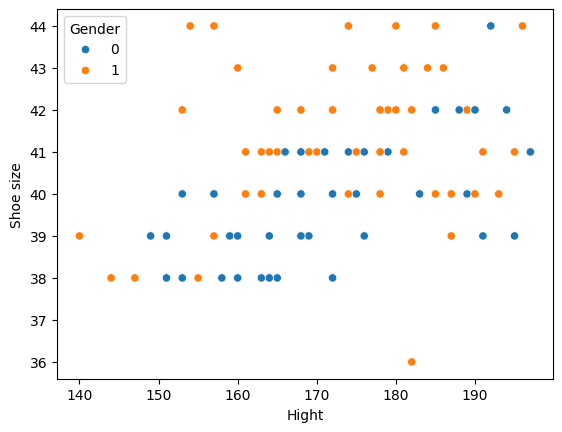

In [7]:
sns.scatterplot(df, x='Hight', y='Shoe size', hue='Gender')
plt.show()

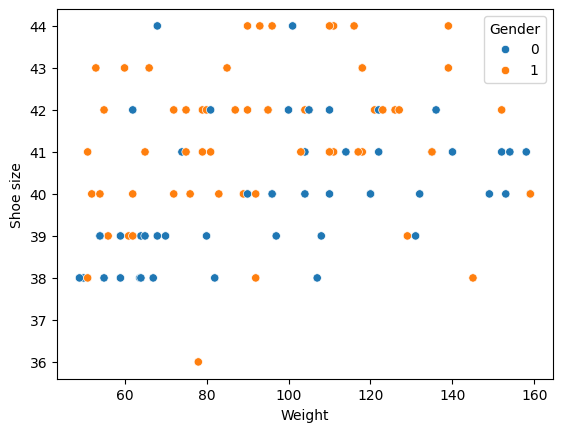

In [8]:
sns.scatterplot(df, x='Weight', y='Shoe size', hue='Gender')
plt.show()

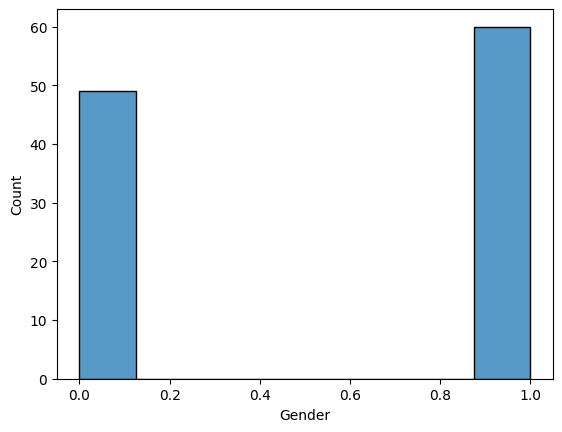

In [9]:
sns.histplot(df, x='Gender')
plt.show()

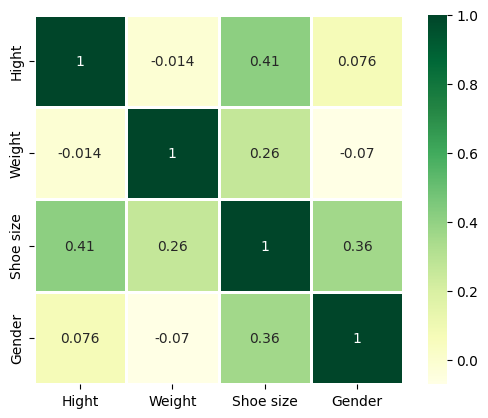

In [10]:
corr = df.corr()

sns.heatmap(corr, cmap='YlGn', square=True, linewidths=1, annot=True)

plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [12]:
lr_model.fit(df[['Hight']], df['Shoe size'])

LinearRegression()

In [13]:
print(f"Theta-1: {lr_model.coef_}")
print(f"Theta-0: {lr_model.intercept_}")

Theta-1: [0.05403062]
Theta-0: 31.37401223042722


In [14]:
def theta(X, Y):
    return np.sum((X - X.mean()) * (Y - Y.mean())) / np.sum((X - X.mean()) ** 2)

In [15]:
theta1 = theta(df['Hight'], df['Shoe size'])
theta2 = theta(df['Weight'], df['Shoe size'])
theta3 = theta(df['Gender'], df['Shoe size'])

print('Theta-1', theta1)
print('Theta-2', theta2)
print('Theta-3', theta3)

Theta-1 0.054030615675542744
Theta-2 0.015193191969213458
Theta-3 1.2758503401360544


In [16]:
theta0 = df['Shoe size'].mean() - (theta1 * df['Hight'].mean() + theta2 * df['Weight'].mean() + theta3 * df['Gender'].mean())

theta0

29.214877322970416

In [17]:
lr_model = LinearRegression()

In [18]:
lr_model.fit(df[['Hight', 'Weight', 'Gender']], df['Shoe size'])

LinearRegression()

In [19]:
print('Theta-0: ', lr_model.intercept_)
print('Thetas: ', lr_model.coef_)

Theta-0:  29.578702540397344
Thetas:  [0.05107269 0.01693894 1.24259561]


In [41]:
X_test = df[['Hight', 'Weight', 'Gender']].sample(10)
y_test = df['Shoe size'].loc[X_test.index]

X_test

,Hight,Weight,Gender
48,185,139.0,1
61,195,65.0,0
62,160,131.0,0
76,161,72.0,1
71,161,118.0,1
97,185,100.0,0
55,190,95.0,1
18,174,68.0,0
92,168,59.0,0
101,176,122.0,0


In [57]:
def predict(X):
    thetas = np.array([theta1, theta2, theta3])

    return theta0 + np.dot(X, thetas)


In [61]:
predict(X_test.values)

array([42.59824525, 40.73840486, 39.85008398, 40.28356661, 40.98245344,
       40.72986042, 42.19989788, 39.6493415 , 39.18841908, 40.5778351 ])

In [62]:
lr_model.predict(X_test)

array([42.62425894, 40.6389088 , 39.96933448, 40.2636054 , 41.04279658,
       40.72104472, 42.1343091 , 39.61719905, 39.15831244, 40.63404713])